In [5]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range
from scipy.stats import beta

In [6]:
class Variant:
    def __init__(self, p):
        self.p = p
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, result_of_pull):
        pass

In [7]:
class Bayesian(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.a = 1
        self.b = 1

    def update(self, result_of_pull):
        self.N += 1
        self.a += result_of_pull
        self.b += 1 - result_of_pull

In [8]:
def bayesian_experiment(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75]):
    variants = [Bayesian(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        chosen_bandit_index = np.argmax([beta.rvs(variant.a, variant.b, size=1) for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print("Bandits' Parameters' Estimates:", [(variant.a, variant.b) for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    x = np.linspace(0, 1, 200)
    for b in variants:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Real p: {b.p:.4f}, Win Rate = {b.a-1}/{b.N}")
    
    plt.title(f"Bandit distributions after {numb_of_trials} trials")
    plt.legend()
    plt.show()

Optimal j: 2
Optimal Run Percentage: 99.60%
Bandits' Parameters' Estimates: [(7, 14), (9, 14), (7460, 2502)]
Reward Percentage:  0.7473


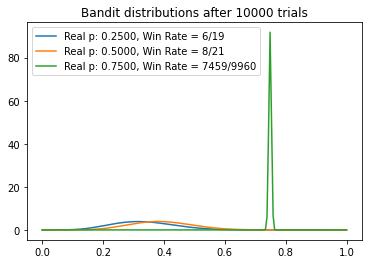

In [9]:
bayesian_experiment(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75])